# Wine Quality Prediction

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, metrics

import warining
warnings.filterwarnings("ignore  ")




In [2]:
# loading the dataset
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# sahpe of the dataset
df.shape

(1599, 12)

In [4]:
# checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.duplicated().sum()

0

In [7]:
duplicate = df[df.duplicated()]

duplicate

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
df = df.drop_duplicates()

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Data Preprocessing

In [13]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [14]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.rename(columns={'quality': 'good_quality'}, inplace=True)
df.head()

<ipython-input-14-6ea228c2d1e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
C:\Users\owino\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good-quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


## Exploratory Data Analysis

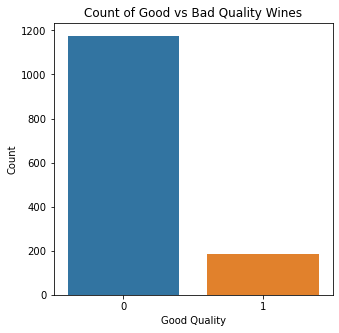

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(x='good-quality', data=df)
plt.xlabel('Good Quality')
plt.ylabel('Count')
plt.title('Count of Good vs Bad Quality Wines')
plt.show()

#### Analysis of coorelation between features

<AxesSubplot:>

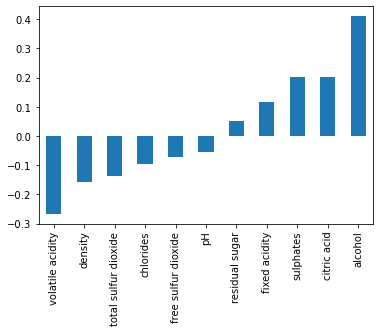

In [16]:
df.corr()['good-quality'][:-1].sort_values().plot(kind='bar')

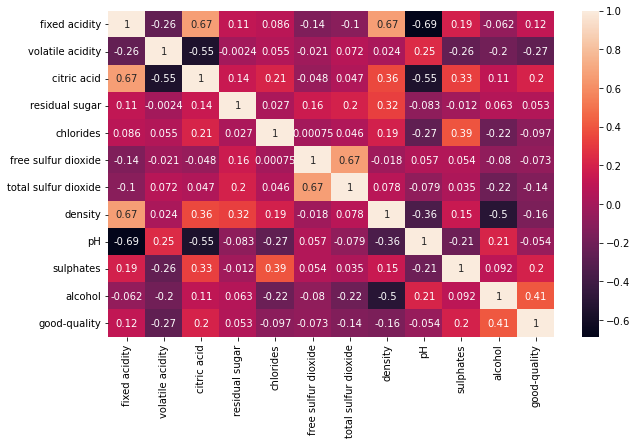

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='residual sugar', ylabel='alcohol'>

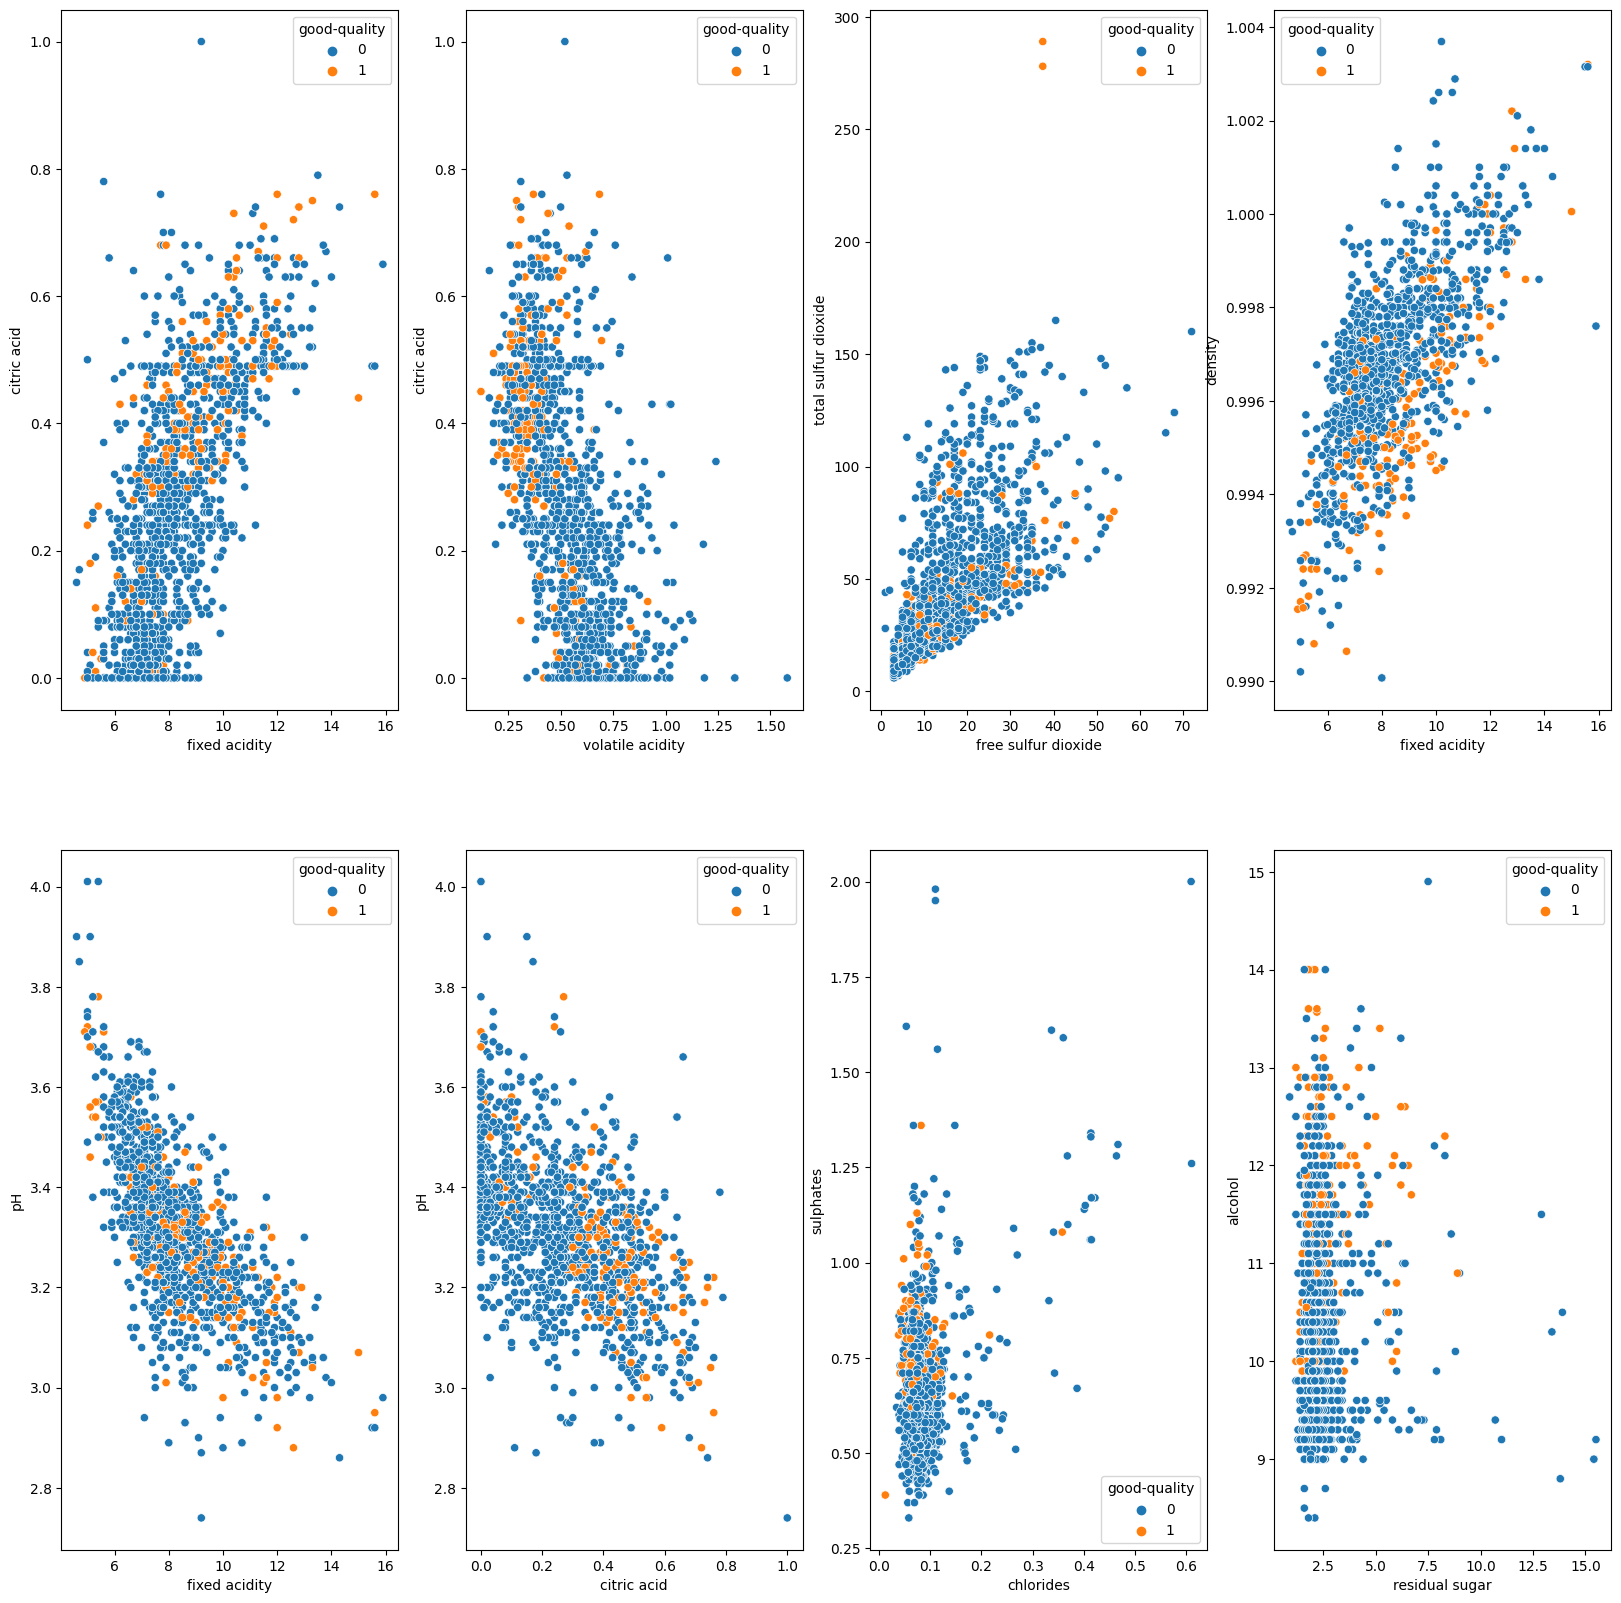

In [105]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.scatterplot(x = 'fixed acidity', y = 'citric acid', hue = 'good-quality', data = df, ax=ax[0,0])
sns.scatterplot(x = 'volatile acidity', y = 'citric acid', hue = 'good-quality', data = df, ax=ax[0,1])
sns.scatterplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'good-quality', data = df, ax=ax[0,2])
sns.scatterplot(x = 'fixed acidity', y = 'density', hue = 'good-quality', data = df, ax=ax[0,3])
sns.scatterplot(x = 'fixed acidity', y = 'pH', hue = 'good-quality', data = df, ax=ax[1,0])
sns.scatterplot(x = 'citric acid', y = 'pH', hue = 'good-quality', data = df, ax=ax[1,1])
sns.scatterplot(x = 'chlorides', y = 'sulphates', hue = 'good-quality', data = df, ax=ax[1,2])
sns.scatterplot(x = 'residual sugar', y = 'alcohol', hue = 'good-quality', data = df, ax=ax[1,3])


### Handling Outliers

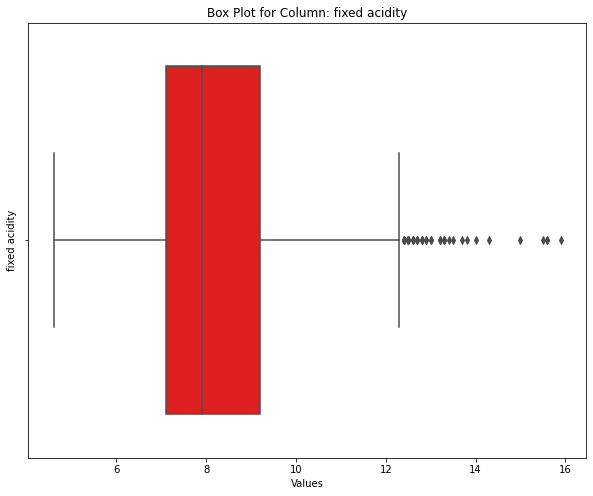

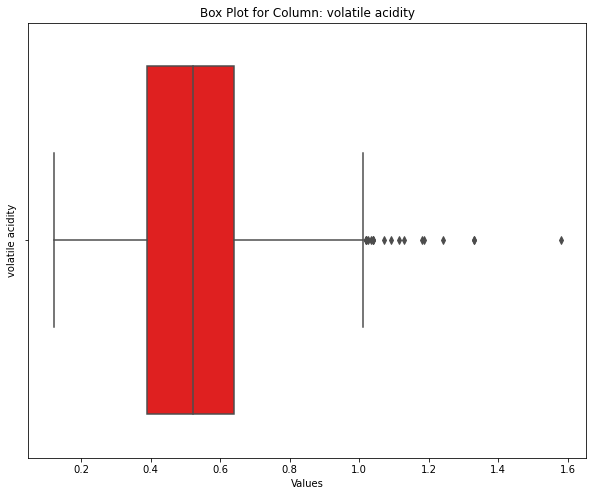

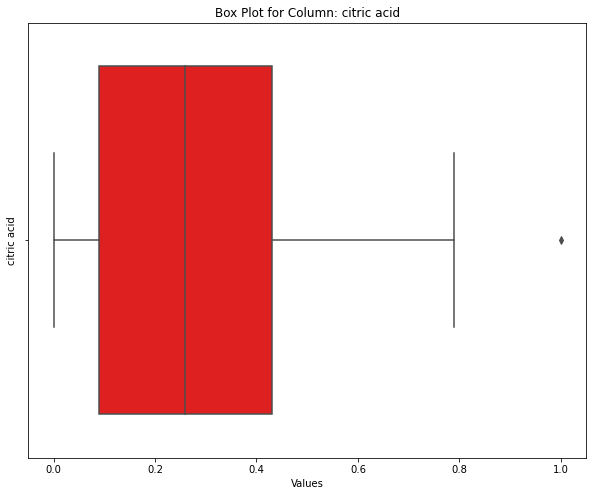

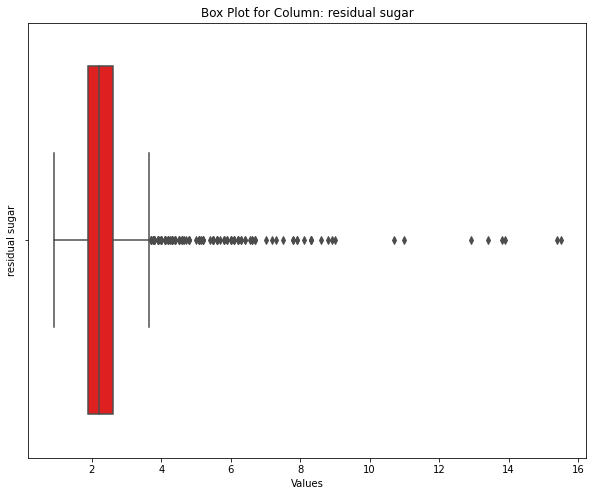

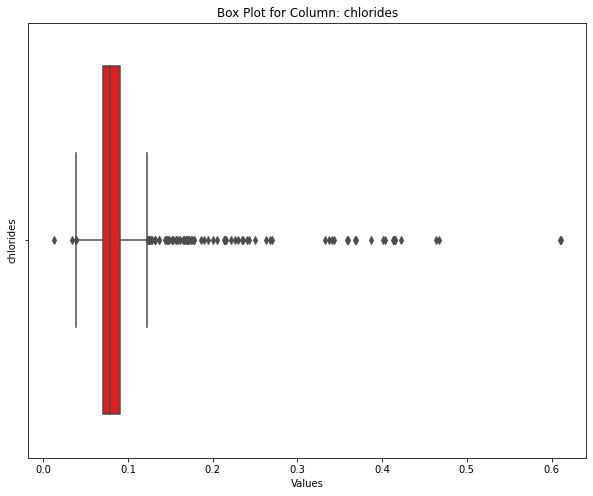

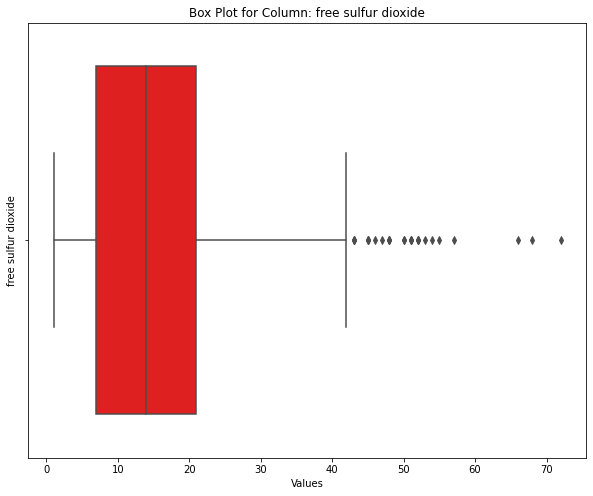

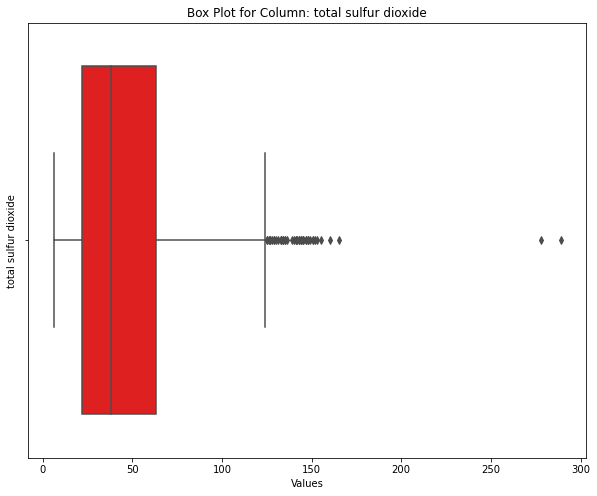

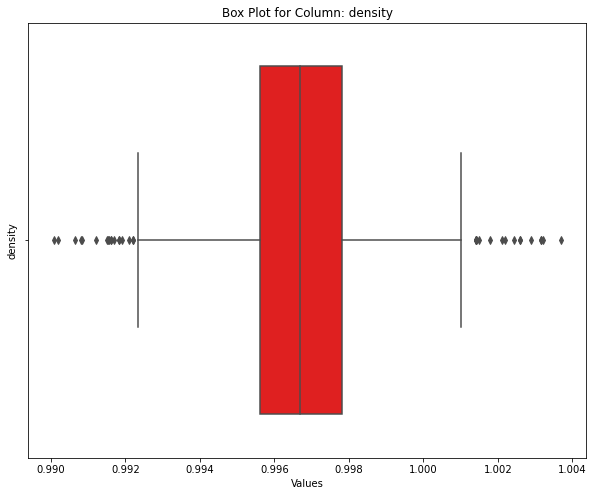

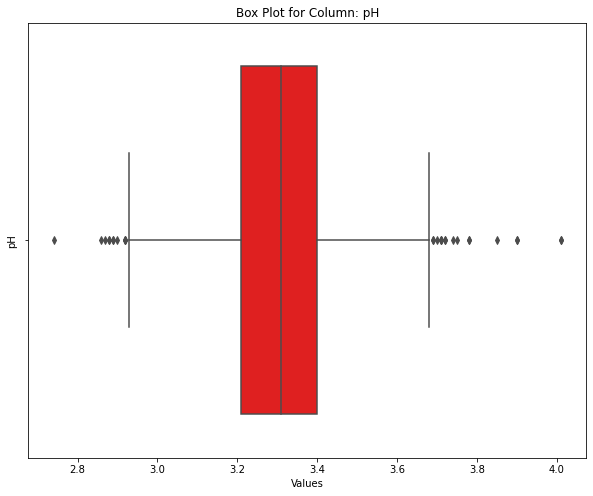

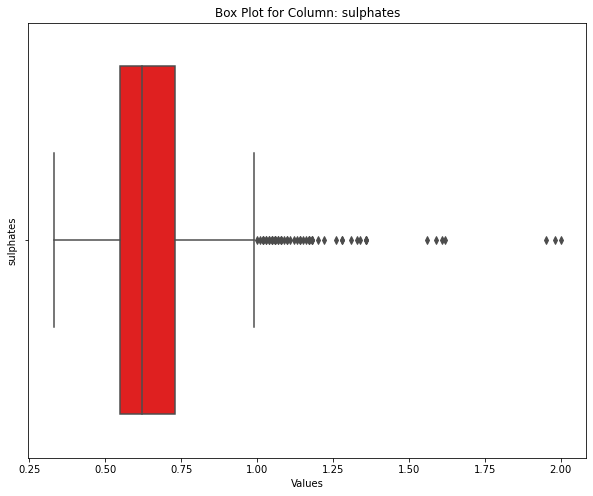

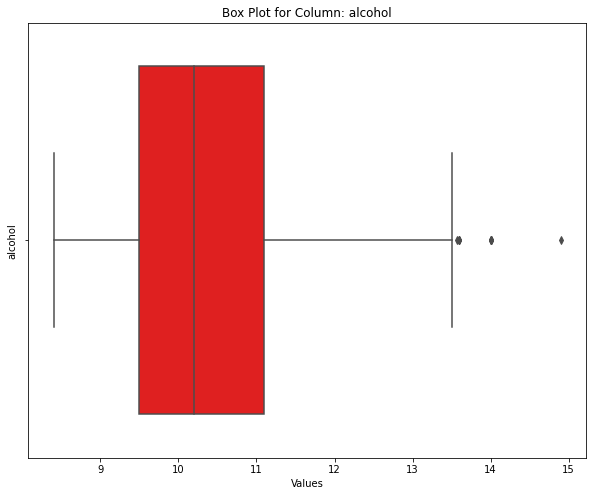

In [108]:
float_columns = df.select_dtypes(include=['float']).columns

# Create box plots for each float column
for column in float_columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x = df[column], color = "r")
    plt.title(f'Box Plot for Column: {column}')
    plt.xlabel('Values')
    plt.ylabel(column)
    plt.show()

In [109]:
# function to remove the outliers and create a dataframe 
def remove_outliers(df, multiplier=1.5):
    # Filter columns with float data types
    float_columns = df.select_dtypes(include=['float']).columns

    # Create a copy of the DataFrame
    df1 = df.copy()

    # Iterate through float columns and remove outliers
    for column in float_columns:
        Q1 = df1[column].quantile(0.25)
        Q3 = df1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - multiplier * IQR
        upper_fence = Q3 + multiplier * IQR

        # Remove outliers
        df1 = df1[(df1[column] >= lower_fence) & (df1[column] <= upper_fence)]

    return df1

df1 = remove_outliers(df)


In [128]:
df1.shape

(985, 12)

In [129]:
df.shape

(1359, 12)

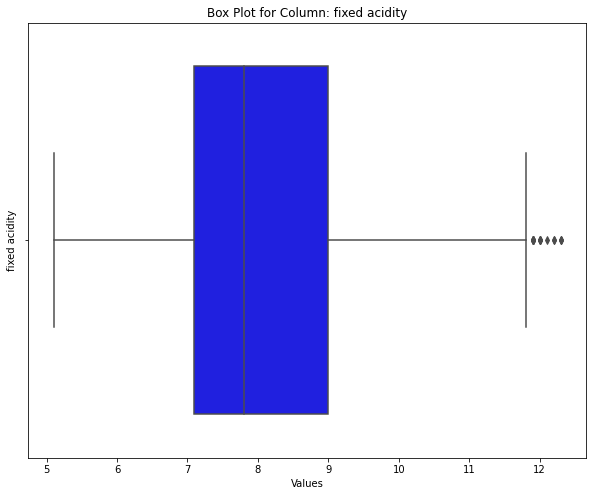

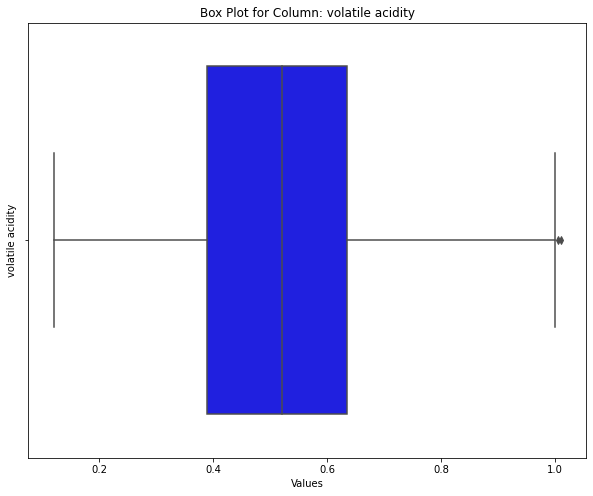

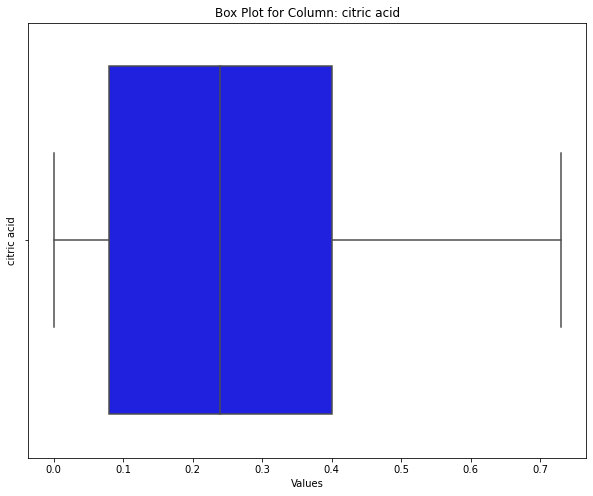

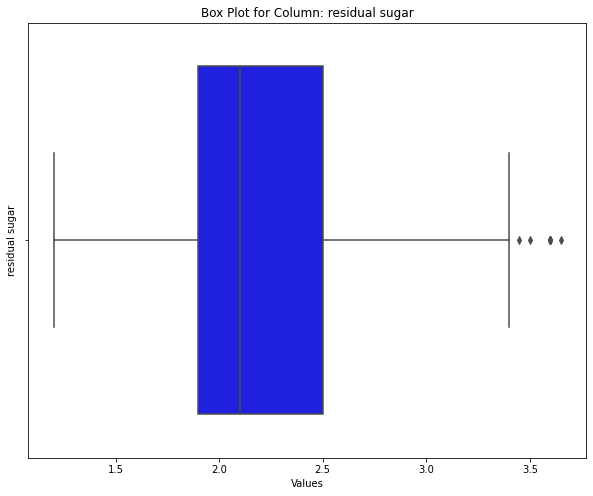

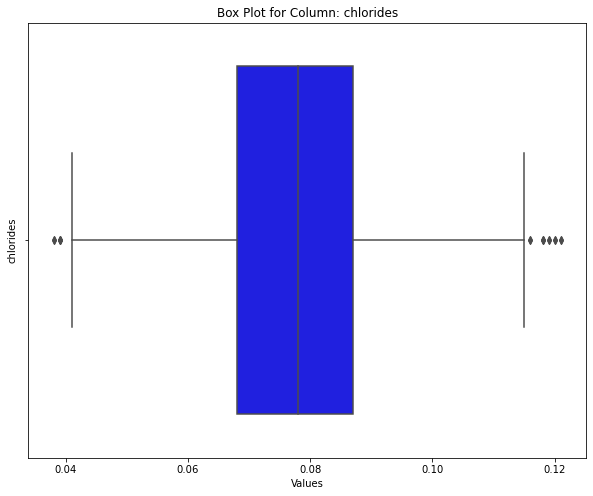

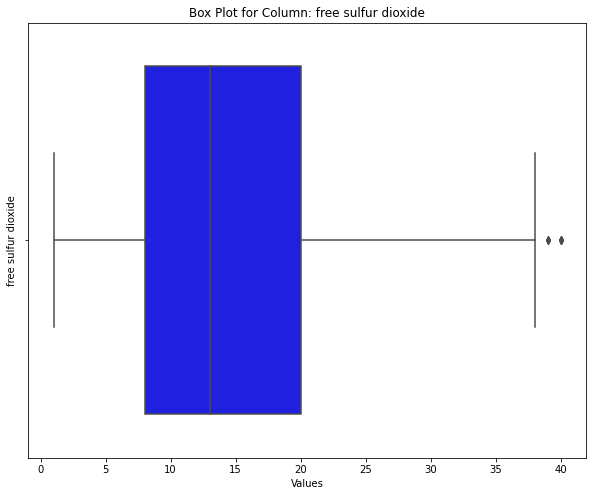

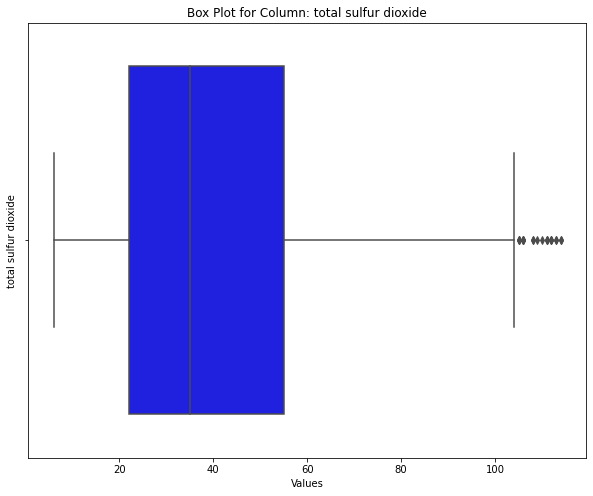

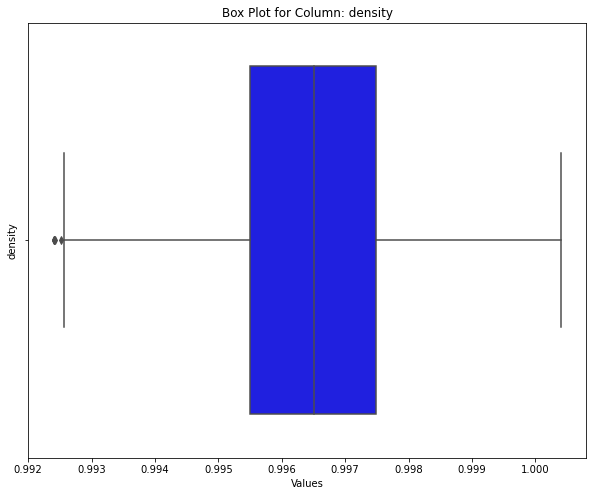

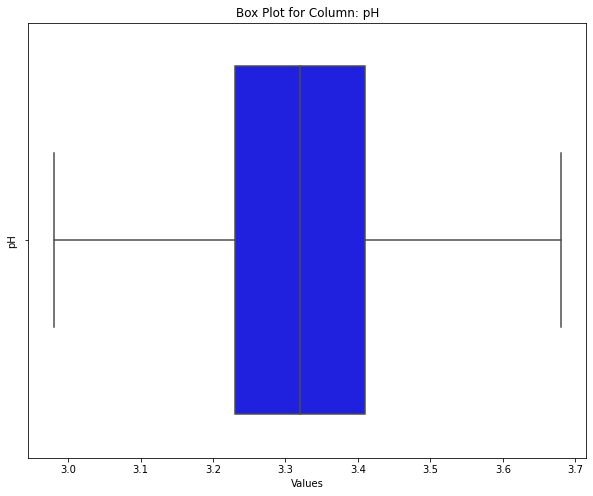

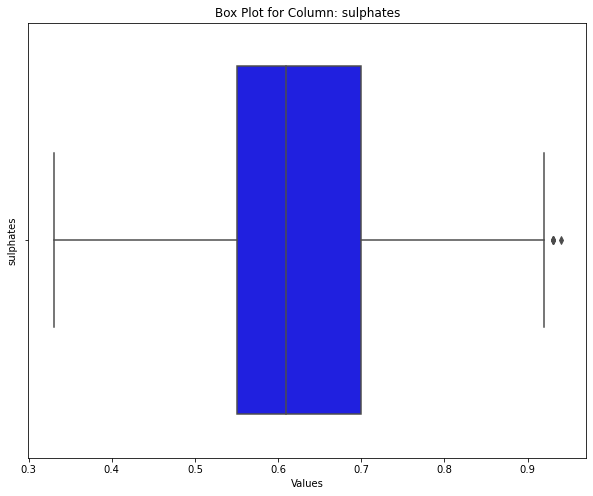

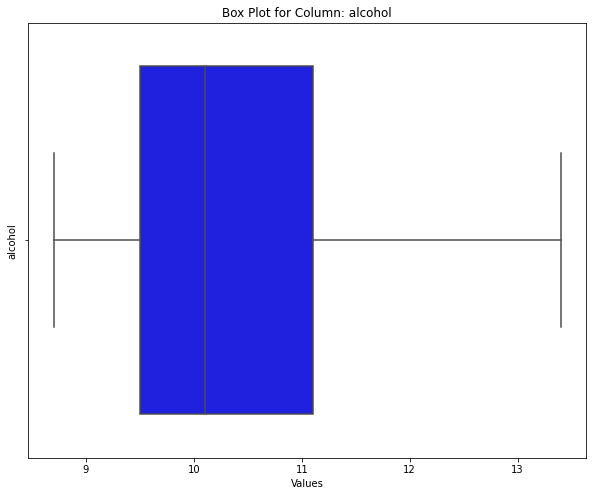

In [110]:
# Boxplot after removal of outlliers
float_columns = df1.select_dtypes(include=['float']).columns

# Create box plots for each float column
for column in float_columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x = df1[column], color = "b")
    plt.title(f'Box Plot for Column: {column}')
    plt.xlabel('Values')
    plt.ylabel(column)
    plt.show()

In [54]:
y_train.value_counts()

0    821
1    130
Name: good-quality, dtype: int64

## Train Test Split

In [111]:
x = df1.drop('good-quality', axis=1)
y = df1['good-quality']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<AxesSubplot:ylabel='good-quality'>

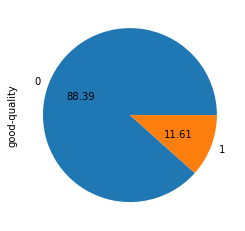

In [113]:
# Pie chart of the training set
y_train.value_counts().plot.pie(autopct='%.2f')

## Class Balancing

### Random Undersampling
'not minority' = resample all classes but the minority class

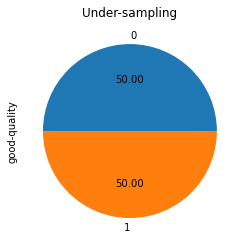

In [114]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1) 
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [115]:
y_train_rus.value_counts()

0    80
1    80
Name: good-quality, dtype: int64

### Random Oversampling¶
"not majority" = resample all classes but the majority class

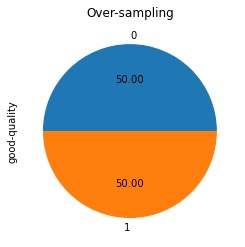

In [116]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [117]:
y_train_ros.value_counts()

0    609
1    609
Name: good-quality, dtype: int64

## Model Training and Perfomance With and  Without Class Balancing

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

def print_classification_reports(X_train, y_train):
    # Splitting the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Initializing the models
    logistic_regression_model = LogisticRegression()
    decision_tree_model = DecisionTreeClassifier()
    kn_neighbors_model = KNeighborsClassifier()
    svm_model = SVC()
    
    # Training the models
    logistic_regression_model.fit(X_train, y_train)
    decision_tree_model.fit(X_train, y_train)
    kn_neighbors_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    
    # Generating predictions on the validation set
    logistic_regression_preds = logistic_regression_model.predict(X_val)
    decision_tree_preds = decision_tree_model.predict(X_val)
    kn_neighbors_preds = kn_neighbors_model.predict(X_val)
    svm_preds = svm_model.predict(X_val)
    
    # Printing the classification reports
    print("Logistic Regression Classification Report:")
    print(classification_report(y_val, logistic_regression_preds))
    
    print("Decision Tree Classification Report:")
    print(classification_report(y_val, decision_tree_preds))
    
    print("k-Nearest Neighbors Classification Report:")
    print(classification_report(y_val, kn_neighbors_preds))
    
    print("Support Vector Machine Classification Report:")
    print(classification_report(y_val, svm_preds))

### Classification Report Without Class Balancing

In [119]:
print_classification_reports(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       123
           1       0.50      0.13      0.21        15

    accuracy                           0.89       138
   macro avg       0.70      0.56      0.58       138
weighted avg       0.86      0.89      0.86       138

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       123
           1       0.29      0.33      0.31        15

    accuracy                           0.84       138
   macro avg       0.61      0.62      0.61       138
weighted avg       0.85      0.84      0.84       138

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       123
           1       0.00      0.00      0.00        15

    accuracy                           0.86       138
   ma

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


### Classification Report After Class Balancing with Random Undersampling

In [120]:
print_classification_reports(X_train_rus, y_train_rus)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.44      0.56        16
           1       0.61      0.88      0.72        16

    accuracy                           0.66        32
   macro avg       0.69      0.66      0.64        32
weighted avg       0.69      0.66      0.64        32

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.53      0.50      0.52        16

    accuracy                           0.53        32
   macro avg       0.53      0.53      0.53        32
weighted avg       0.53      0.53      0.53        32

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.47      0.50      0.48        16

    accuracy                           0.47        32
   ma

### Classification Report After Class Balancing with Random Oversampling

In [121]:
print_classification_reports(X_train_ros, y_train_ros)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       128
           1       0.76      0.84      0.80       116

    accuracy                           0.80       244
   macro avg       0.80      0.80      0.80       244
weighted avg       0.80      0.80      0.80       244

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       128
           1       0.91      1.00      0.95       116

    accuracy                           0.95       244
   macro avg       0.96      0.96      0.95       244
weighted avg       0.96      0.95      0.95       244

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       128
           1       0.75      0.97      0.85       116

    accuracy                           0.83       244
   ma

As observed above, it is clear that the decision tree model exhibits the best performance after applying class balancing with random oversampling, outperforming the other models. Consequently, the subsequent analysis will be centered on enhancing this particular model and constructing a functional model based on its performance.

### Cross Validation

To improve the robustness of the model by testing it to different train and test sample

In [124]:
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 10)

cross_val_score(DecisionTreeClassifier(), X_train_ros, y_train_ros, cv = cv)

array([0.95081967, 0.96721311, 0.96311475, 0.93032787, 0.93032787])

In [125]:
kv = KFold(n_splits = 5, shuffle = True, random_state = 42)

cross_val_score(DecisionTreeClassifier(), X_train_ros, y_train_ros, cv = kv)

array([0.95901639, 0.94672131, 0.93032787, 0.94238683, 0.94238683])

In [126]:
import pickle

pickle.dump(dt, open("model.pkl", "wb"))

### SHAP Analysis

  0%|          | 0/296 [00:00<?, ?it/s]

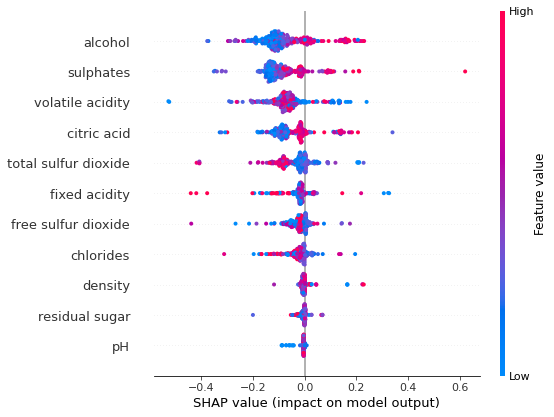

In [135]:
import shap

ex = shap.KernelExplainer(dt.predict, shap.sample(X_train_ros,100))

shap.initjs()
shap_values = ex.shap_values(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) 

shap.summary_plot(shap_values, X_test)

The provided plot clearly indicates that the PH value, residual sugar, and density exert minimal impact on the target variable. Consequently, in an effort to enhance model efficiency, these columns will be excluded from the model.

In [139]:
X_train_ros.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [145]:
X_train_ros.drop(['residual sugar', 'pH', 'density'], axis = 1, inplace = True)

In [146]:
print_classification_reports(X_train_ros, y_train_ros)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       128
           1       0.72      0.84      0.78       116

    accuracy                           0.77       244
   macro avg       0.78      0.77      0.77       244
weighted avg       0.78      0.77      0.77       244

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       128
           1       0.91      1.00      0.95       116

    accuracy                           0.95       244
   macro avg       0.95      0.95      0.95       244
weighted avg       0.96      0.95      0.95       244

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80       128
           1       0.74      0.97      0.84       116

    accuracy                           0.82       244
   ma

In [158]:
# the best performing model
dt = DecisionTreeClassifier()
dt.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier()

In [159]:
import pickle

# saving the model in a pickle file
model = pickle.dump(dt, open("model.pkl","wb"))

# loading the model int the console
model = pickle.load(open('model.pkl','rb'))

In [150]:
X_train_eff.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.7,0.660,0.04,0.039,4.0,9.0,0.47,9.4
1,7.6,0.715,0.00,0.068,30.0,35.0,0.65,11.4
2,8.2,0.440,0.24,0.063,10.0,28.0,0.53,10.2
3,9.3,0.430,0.44,0.085,9.0,22.0,0.55,9.5
4,9.0,0.690,0.00,0.088,19.0,38.0,0.60,9.3


In [ ]:
df[df["fixed acidity"] == 7.9]

In [162]:
print(model.predict([[7.9, 0.340, 0.36,	0.065, 5.0,	10.0, 0.54,	11.2]]))

[1]


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [163]:
X_train_ros.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,8.260263,0.468703,0.290731,0.075447,13.474548,36.077176,0.670033,10.870197
std,1.583931,0.165097,0.178854,0.016735,8.059950,24.526590,0.116819,1.079101
min,5.100000,0.160000,0.000000,0.038000,1.000000,6.000000,0.330000,8.700000
25%,7.100000,0.330000,0.120000,0.064000,6.000000,18.000000,0.580000,10.000000
50%,8.000000,0.430000,0.320000,0.074000,12.000000,28.000000,0.660000,10.900000
75%,9.300000,0.580000,0.437500,0.085000,18.000000,48.000000,0.760000,11.700000
max,12.300000,1.010000,0.690000,0.121000,40.000000,114.000000,0.930000,13.300000


In [164]:
df2 = df.drop(['residual sugar', 'pH', 'density', 'good-quality'], axis = 1)

In [165]:
def calculate_outer_fences(data_frame, multiplier=1.5):
    outer_fences = {}

    # Filter columns with float data types
    float_columns = data_frame.select_dtypes(include=['float']).columns

    for column in float_columns:
        Q1 = data_frame[column].quantile(0.25)
        Q3 = data_frame[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_outer_fence = Q1 - multiplier * IQR
        upper_outer_fence = Q3 + multiplier * IQR

        outer_fences[column] = {
            'lower_fence': lower_outer_fence,
            'upper_fence': upper_outer_fence
        }

    return outer_fences

In [166]:
# getting the limits in each column
outer_fences = calculate_outer_fences(df2)
print(outer_fences)

{'fixed acidity': {'lower_fence': 3.95, 'upper_fence': 12.349999999999998}, 'volatile acidity': {'lower_fence': 0.015000000000000013, 'upper_fence': 1.0150000000000001}, 'citric acid': {'lower_fence': -0.42000000000000004, 'upper_fence': 0.94}, 'chlorides': {'lower_fence': 0.03850000000000002, 'upper_fence': 0.12249999999999998}, 'free sulfur dioxide': {'lower_fence': -14.0, 'upper_fence': 42.0}, 'total sulfur dioxide': {'lower_fence': -39.5, 'upper_fence': 124.5}, 'sulphates': {'lower_fence': 0.28000000000000014, 'upper_fence': 0.9999999999999999}, 'alcohol': {'lower_fence': 7.1000000000000005, 'upper_fence': 13.5}}


In [ ]:
import numpy as np
from flask import Flask, request, render_template
import pickle

#Create an app object using the Flask class. 
app = Flask(__name__)

#Load the trained model. (Pickle file)
model = pickle.load(open('model.pkl', 'rb'))


@app.route('/')
def home():
    return render_template('index.html')


@app.route('/predict', methods=['POST'])
def predict():
    int_features = [float(x) for x in request.form.values()]
    features = [np.array(int_features)]
    prediction = model.predict(features)
    
    output = prediction[0]
    
    if output == 1:
        prediction_text = 'Good Quality wine'
    else:
        prediction_text = 'Poor Quality wine'
    
    return render_template('index.html', prediction_text=prediction_text)


if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Aug/2023 10:58:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Aug/2023 10:58:09] "GET /favicon.ico HTTP/1.1" 404 -
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
127.0.0.1 - - [18/Aug/2023 10:59:29] "POST /predict HTTP/1.1" 200 -
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
127.0.0.1 - - [18/Aug/2023 11:00:03] "POST /predict HTTP/1.1" 200 -
